In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#enable Ipython to display matplotlib graphs
%matplotlib inline

In [2]:
NY = pd.read_csv("NewYork.csv")
NY = NY.rename(columns={"New Date": "Old Date"})
NY

,Date,2020 AQI Value,Main Pollutant,Site Name,Site ID,Source,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),Old Date
0,1/1/2020,36,PM2.5,Intermediate School 143,36-061-0115,AQS,119,42,51,1/1
1,1/2/2020,56,PM2.5,Intermediate School 143,36-061-0115,AQS,115,45,63,1/2
2,1/3/2020,62,PM2.5,Intermediate School 143,36-061-0115,AQS,90,43,56,1/3
3,1/4/2020,55,PM2.5,CCNY,36-061-0135,AQS,95,46,48,1/4
4,1/5/2020,37,PM2.5,CCNY,36-061-0135,AQS,91,33,48,1/5
...,...,...,...,...,...,...,...,...,...,...
108,4/18/2020,33,Ozone,CCNY,36-061-0135,AirNow,85,24,38,4/18
109,4/19/2020,46,Ozone,CCNY,36-061-0135,AirNow,98,30,39,4/19
110,4/20/2020,37,Ozone,CCNY,36-061-0135,AirNow,77,24,36,4/20
111,4/21/2020,35,Ozone,CCNY,36-061-0135,AirNow,83,32,39,4/21


In [3]:
NY.columns

Index(['Date', '2020 AQI Value', 'Main Pollutant', 'Site Name', 'Site ID',
       'Source', '20-year High (1980-2019)', '20-year Low (1980-2019)',
       '5-year Median (2015-2019)', 'Old Date'],
      dtype='object')

In [4]:
New_NY = NY.drop(["Site Name", "Site ID", "Source"], axis = 1)
New_NY

,Date,2020 AQI Value,Main Pollutant,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),Old Date
0,1/1/2020,36,PM2.5,119,42,51,1/1
1,1/2/2020,56,PM2.5,115,45,63,1/2
2,1/3/2020,62,PM2.5,90,43,56,1/3
3,1/4/2020,55,PM2.5,95,46,48,1/4
4,1/5/2020,37,PM2.5,91,33,48,1/5
...,...,...,...,...,...,...,...
108,4/18/2020,33,Ozone,85,24,38,4/18
109,4/19/2020,46,Ozone,98,30,39,4/19
110,4/20/2020,37,Ozone,77,24,36,4/20
111,4/21/2020,35,Ozone,83,32,39,4/21


In [5]:
NY.describe()

,2020 AQI Value,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019)
count,113.000000,113.000000,113.000000,113.000000
mean,37.946903,91.141593,29.584071,46.300885
std,9.383535,17.118217,7.193407,8.154627
min,19.000000,51.000000,3.000000,31.000000
25%,31.000000,81.000000,25.000000,39.000000
50%,36.000000,90.000000,30.000000,46.000000
75%,43.000000,99.000000,33.000000,53.000000
max,67.000000,144.000000,46.000000,67.000000


In [6]:
NY.dtypes

Date                         object
2020 AQI Value                int64
Main Pollutant               object
Site Name                    object
Site ID                      object
Source                       object
20-year High (1980-2019)      int64
20-year Low (1980-2019)       int64
5-year Median (2015-2019)     int64
Old Date                     object
dtype: object

In [7]:
groupby_pollutant = New_NY.groupby(["Main Pollutant"])
pollutant_type = groupby_pollutant["Main Pollutant"].count()

avg_2020 = groupby_pollutant["2020 AQI Value"].mean()
highest_in_20Y = groupby_pollutant["20-year High (1980-2019)"].max()
lowest_in_20Y = groupby_pollutant["20-year Low (1980-2019)"].min()

highest_in_5Y = groupby_pollutant["5-year Median (2015-2019)"].max()
lowest_in_5y = groupby_pollutant["5-year Median (2015-2019)"].min()

pollutant = pd.DataFrame ({
                                "Caused in 2020": pollutant_type,
                                "Average in 2020": avg_2020,
                                "Highest in 20 Years": highest_in_20Y,
                                "Lowest in 20 Years": lowest_in_20Y,
                                "Highest in 5 Years": highest_in_5Y,
                                "Lowest in 5 Years": lowest_in_5y
})

pollutant

,Caused in 2020,Average in 2020,Highest in 20 Years,Lowest in 20 Years,Highest in 5 Years,Lowest in 5 Years
Main Pollutant,,,,,,
Ozone,61,33.344262,144,19,59,31
PM2.5,52,43.346154,132,3,67,39


In [8]:
print(f"The total pollution/day caused by Ozone in 2020 is {pollutant.iat[0,0]}")
print(f"The total pollution/day caused by PM2.5 in 2020 is {pollutant.iat[1,0]}")
print(f"---------------------------------------------------------------")
print(f"The average pollution caused by Ozone in 2020 is {pollutant.iat[0,1]}")
print(f"The average pollution caused by PM2.5 in 2020 is {pollutant.iat[1,1]}")
print(f"---------------------------------------------------------------")
print(f"The highest pollution caused by Ozone in the last 20 years is {pollutant.iat[0,2]}")
print(f"The highest pollution caused by PM2.5 in the last 20 years is {pollutant.iat[1,2]}")
print(f"---------------------------------------------------------------")
print(f"The lowest pollution caused by Ozone in the last 20 years is {pollutant.iat[0,3]}")
print(f"The lowest pollution caused by PM2.5 in the last 20 years is {pollutant.iat[1,3]}")
print(f"---------------------------------------------------------------")
print(f"The highest pollution caused by Ozone in the last 5 years is {pollutant.iat[0,4]}")
print(f"The highest pollution caused by PM2.5 in the last 5 years is {pollutant.iat[1,4]}")
print(f"---------------------------------------------------------------")
print(f"The lowest pollution caused by Ozone in the last 5 years is {pollutant.iat[0,5]}")
print(f"The lowest pollution caused by PM2.5 in the last 5 years is {pollutant.iat[1,5]}")


The total pollution/day caused by Ozone in 2020 is 61
The total pollution/day caused by PM2.5 in 2020 is 52
---------------------------------------------------------------
The average pollution caused by Ozone in 2020 is 33.34426229508197
The average pollution caused by PM2.5 in 2020 is 43.34615384615385
---------------------------------------------------------------
The highest pollution caused by Ozone in the last 20 years is 144
The highest pollution caused by PM2.5 in the last 20 years is 132
---------------------------------------------------------------
The lowest pollution caused by Ozone in the last 20 years is 19
The lowest pollution caused by PM2.5 in the last 20 years is 3
---------------------------------------------------------------
The highest pollution caused by Ozone in the last 5 years is 59
The highest pollution caused by PM2.5 in the last 5 years is 67
---------------------------------------------------------------
The lowest pollution caused by Ozone in the last 5 

In [9]:
Current_NY = New_NY.drop(New_NY.iloc[:, 3:7], axis = 1)
Current_NY

,Date,2020 AQI Value,Main Pollutant
0,1/1/2020,36,PM2.5
1,1/2/2020,56,PM2.5
2,1/3/2020,62,PM2.5
3,1/4/2020,55,PM2.5
4,1/5/2020,37,PM2.5
...,...,...,...
108,4/18/2020,33,Ozone
109,4/19/2020,46,Ozone
110,4/20/2020,37,Ozone
111,4/21/2020,35,Ozone


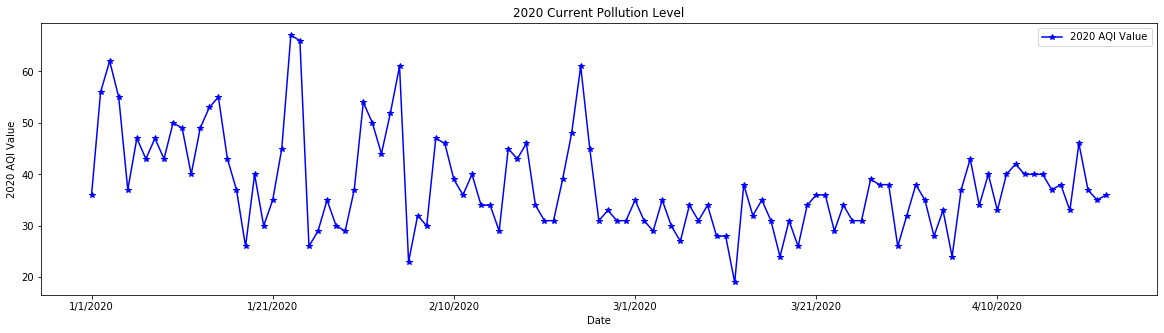

In [10]:
New_NY.plot(kind= "line", x='Date', y='2020 AQI Value', marker = "*", color = "blue", \
                figsize=(20,5), title= "2020 Current Pollution Level")
plt.ylabel("2020 AQI Value")
plt.show()

In [11]:
New_NY

,Date,2020 AQI Value,Main Pollutant,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),Old Date
0,1/1/2020,36,PM2.5,119,42,51,1/1
1,1/2/2020,56,PM2.5,115,45,63,1/2
2,1/3/2020,62,PM2.5,90,43,56,1/3
3,1/4/2020,55,PM2.5,95,46,48,1/4
4,1/5/2020,37,PM2.5,91,33,48,1/5
...,...,...,...,...,...,...,...
108,4/18/2020,33,Ozone,85,24,38,4/18
109,4/19/2020,46,Ozone,98,30,39,4/19
110,4/20/2020,37,Ozone,77,24,36,4/20
111,4/21/2020,35,Ozone,83,32,39,4/21


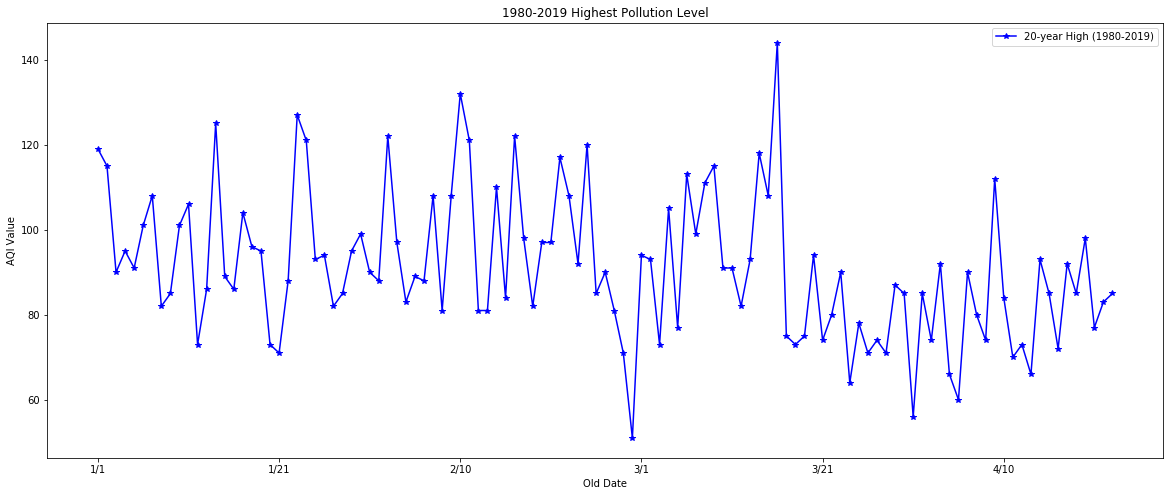

In [12]:
New_NY.plot(kind= "line",x= 'Old Date', y='20-year High (1980-2019)', marker = "*", color = "blue", \
                figsize=(20,8),use_index=True, title= "1980-2019 Highest Pollution Level")
plt.ylabel("AQI Value")
plt.show()

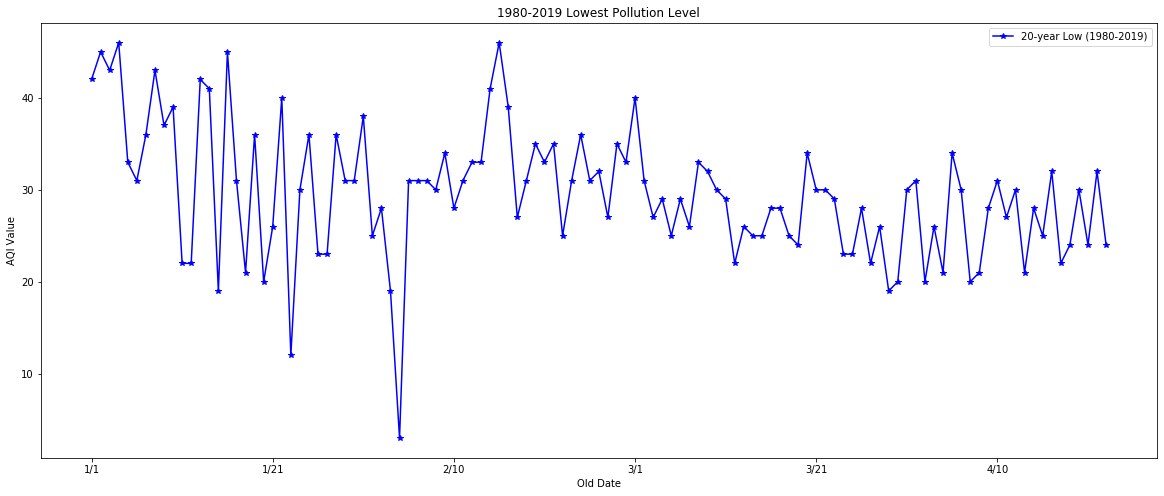

In [13]:
New_NY.plot(kind= "line", x='Old Date', y='20-year Low (1980-2019)', marker = "*", color = "blue", \
                figsize=(20,8), title= "1980-2019 Lowest Pollution Level")
plt.ylabel("AQI Value")
plt.show()

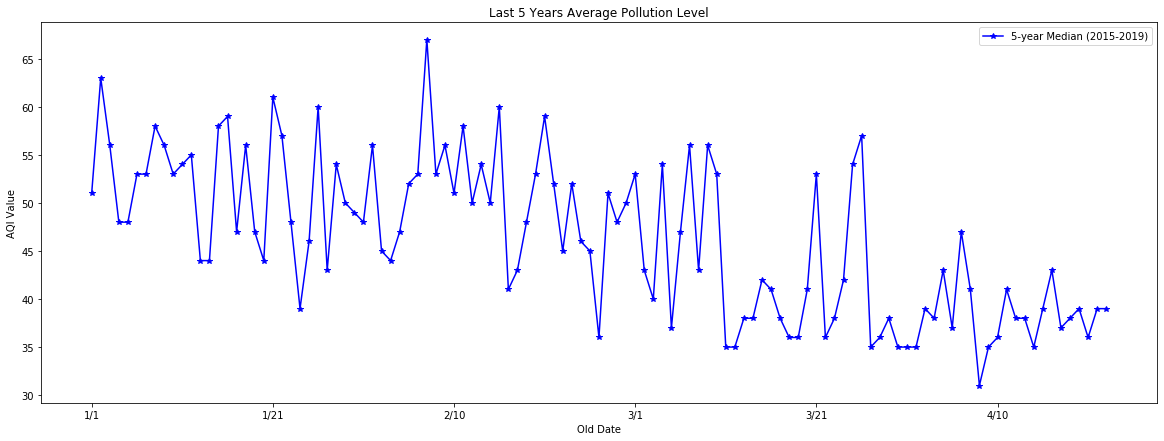

In [14]:
New_NY.plot(kind= "line", x='Old Date', y='5-year Median (2015-2019)',marker = "*", color = "blue", \
                figsize=(20,7), title= "Last 5 Years Average Pollution Level")
plt.ylabel("AQI Value")
plt.show()